# Lab 1: Text Corpora and Language Modelling

Welcome to the first lab assignment of INFOMNLP 2025.

This lab is meant to help you get familiar with some language data, and use this data to estimate simple models called N-gram language models.

First, you will use the **Penn Treebank**, which is a collection of newspaper articles from the newspaper
The Wall Street Journal. The idea is to examine the data and notice interesting properties. This will not take more than a few lines of code. The Penn Treebank may be the most widely used corpus in NLP.

Then you will use a corpus consisting of **TedX** talks. This you will use to estimate an **N-gram language model** for different orders of N, and use this for some tasks.

The dataset URLs are in the notebook and certain cells are responsible for downloading them.

The questions marked **Extra** or **Optional** are an additional challenge for those interested in going the extra mile. There are no points for them.

# Rules

You are greatly encouraged to add comments to your code describing what particular lines of code do (in general, a great habit to have in your coding life).
Additionally, please follow these rules when submitting the notebook:

* Put all code in the cell with the `# YOUR CODE HERE` comment.
* For theoretical questions, put your solution in the `YOUR ANSWER HERE` or `ANSWER UNDER THIS LINE` cells (and keep the header if any).
* Don't change or delete any initially provided cells, either text or code, unless explicitly instructed to do so.
* Don't delete the comment lines `# TEST...` or edit their code cells. The test cells are for sanity checking. Passing them doesn't necessarily mean that your code is fine.
* Don't change the names of provided functions and variables or arguments of the functions.
* Don't clear the output of your code cells.
* Don't output unnecessary info (e.g., printing variables for debugging purposes). This clutters the notebook and slows down the grading. You can have print() in the code, but comment them out before submitting the notebook.
* Delete those cells that you inserted for your own debugging/testing purposes.
* Don't forget to fill in the **contribution information**.
* Don't forget to fill in the **work description section** per exercise.
* Test your code and **make sure we can run your notebook** in the colab environment.
* A single notebook file (without archiving) per group should be submitted via BB.

<font color="red">Following these rules helps us to grade the submissions relatively efficiently. If these rules are violated, a submission will be subject to penalty points.</font>  

# <font color="red">Contributions</font>

YOUR ANSWER HERE [30-50 words]

Contribution Overview:

Everyone reviewed one another’s work.

The symbol * means: this person has given substantial help in this exercize, either trhough answering theoretical questions and/or fixing bugs.

Francesca:
* 1.1b
* 1.1c *
* 1.2b
* 2.1 *
* 2.3

Diego:
* 1.1a (extra)
* 1.1c
* 1.1d
* 2.3 *
* 2.4 *
* 2.5

Jeroen:
* 1.1a
* 1.2a
* 2.1
* 2.2
* 2.4
* 2.5 *


# General instructions

Before diving into the exercises, keep in mind that the variables defined previously can be reused in the subsequent cells. So there is no need to redefine the same variable in multiple sections, e.g., it is sufficient to read the file in a variable once and later reuse the value of the variable, instead of re-reading the file.   

If your code is too long and uses several code cells instead of a single code cell, rethink how to organize data in variables so that you can easily access the required info. Reading about [list comprehension](https://realpython.com/list-comprehension-python/#leverage-list-comprehensions) can be useful.

Your code will often be evaluated based on its behaviour. So, during the grading some code cells are executed. If code runtime is too long than expected, this will hinder grading.

<font color="red">**The cases similar to the above-mentioned ones will be subject to penalty points.**</font>

<font color="red">**Pay attention to test units**</font> that are either provided as assert cases or as comments. Test units help you by giving you a hint about the correct answer. Note that **passing test units doesn't guarantee the full points** for an exercise because test units are incomplete, and the code might fail on other test units.

# Set up

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from itertools import combinations

In [ ]:
! rm -rf data # remove if it was downloaded
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/PTB/sec02-21.gold.tagged # download the file
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/PTB/sec00.gold.tagged
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/TED/ted-train.txt
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/TED/ted-test.txt

2025-05-06 16:26:14 URL:https://naturallogic.pro/_files_/download/mNLP/PTB/sec02-21.gold.tagged [8158400/8158400] -> "data/sec02-21.gold.tagged" [1]
2025-05-06 16:26:15 URL:https://naturallogic.pro/_files_/download/mNLP/PTB/sec00.gold.tagged [399917/399917] -> "data/sec00.gold.tagged" [1]
2025-05-06 16:26:18 URL:https://naturallogic.pro/_files_/download/mNLP/TED/ted-train.txt [24743290/24743290] -> "data/ted-train.txt" [1]
2025-05-06 16:26:18 URL:https://naturallogic.pro/_files_/download/mNLP/TED/ted-test.txt [25383/25383] -> "data/ted-test.txt" [1]


# Golab variables

In [ ]:
PTB_FILES = {'train': 'data/sec02-21.gold.tagged', 'dev': 'data/sec00.gold.tagged'}
TED_FILES = {'train': 'data/ted-train.txt', 'test': 'data/ted-test.txt'}

# 1. Penn treebank

## Ex 1.1 [22pt]

You are provided with a corpus containing tokens with their Part-of-Speech tags (POS-tags for short). The format is
**token|POS** (one sentence per line) and the file name is **sec02-21.gold.tagged**. This data is extracted from Sections 02-21 from the Penn Treebank: these sections are most commonly used for training statistical models like POS taggers and parsers.

Note the **distinction between token & word**. "Token" is a technical term and represents an occurrence of a word. Here, "word" covers both lexical words and other symbols (e.g., punctuations or numbers). Often "word" is called "token type". So, one can say that a token type can have different occurrences and each occurrence is a token.

**[Hint]** **Figure 8.2** in chapter 8 of Jurafsky and Martin (see [here](https://web.stanford.edu/~jurafsky/slp3/8.pdf#page=4)) holds a summary of POS-tags used in the Penn Treebank tagset together with their meaning and some examples.

**[Hint]** The Python library [collections](https://docs.python.org/3.7/library/collections.html) has an object called `Counter` which will come in handy for this exercise.

### (a) Corpus & vocab [5pt]

**Print** the corpus size (i.e. the number of **tokens**).  
**Print** the size of the **vocabulary** of the corpus. Estimate the vocabulary size both by **lowercasing** all the tokens as well as by leaving the tokens in their **original orthography**.  

What is the **advantage** of lowercasing all the tokens in your corpus?  
What is a notable **downside**?  
**Give examples** of the advantage and the downside.

In [ ]:
## YOUR CODE HERE ##
# Use PTB_FILES golab var

train_file = PTB_FILES['train']

# Initializing the variables we need
token_count = 0
vocab = set()
vocab_lower = set()
word_freq = Counter()

with open(train_file, 'r', encoding='utf-8') as f: # Open the file, read it line by line and get rid of special characters
    for line in f:
        line = line.strip()
        if not line:
            continue

        tokens = line.split() # Recording tokens
        token_count += len(tokens) # Increasing the token_count variable with the new tokens of each line

        for token in tokens:
            if '|' not in token:
                continue
            word, pos = token.rsplit('|', 1)
            vocab.add(word) # Adding the word to the vocabulary variable
            vocab_lower.add(word.lower()) # Adding the word to the vocabulary variable (lowercase version)
            word_freq[word] += 1  # Increasing the frequency of the word (for the following extra exercize)

# Printing the results

print(f"Corpus size: {token_count}")
print(f"Vocabulary size (original orthography): {len(vocab)}")
print(f"Vocabulary size (lowercased): {len(vocab_lower)}")


# TEST: original orthography vocab size = ...10 (i.e., the last two digits of the vocab size are "10")

Corpus size: 929552
Vocabulary size (original orthography): 44210
Vocabulary size (lowercased): 39384


█████ ANSWER UNDER THIS LINE █████

What is the advantage of lowercasing all the tokens in your corpus?:

Lowercasing all the tokes avoids counting the same word both in lowecase and uppercase. Therefore, it allows to estimate a more precise vocabulary size for the corpus.

What is a notable downside?

A downside corresponds to a consistent loss of infomration caused by a modification of the original corpus. As an example, the presence of a capitol letter in the word "Sparrow" reveals that it is a surname, whereas the same word written in lowercase has a different meaning.
The same applies, for different reasons, to: "Apple", "Turkey".


------
**For the rest of this exercise <font color="red">you should use the original orthography</font> of the data when answering the questions.**

------

### [Extra]

Plot a graph of word frequency versus rank of a word, in this corpus. Does this corpus obey **Zipf’s law**? For a better picture you might need to make the plot horizontally wide or consider an initial cutoff of ranked words.

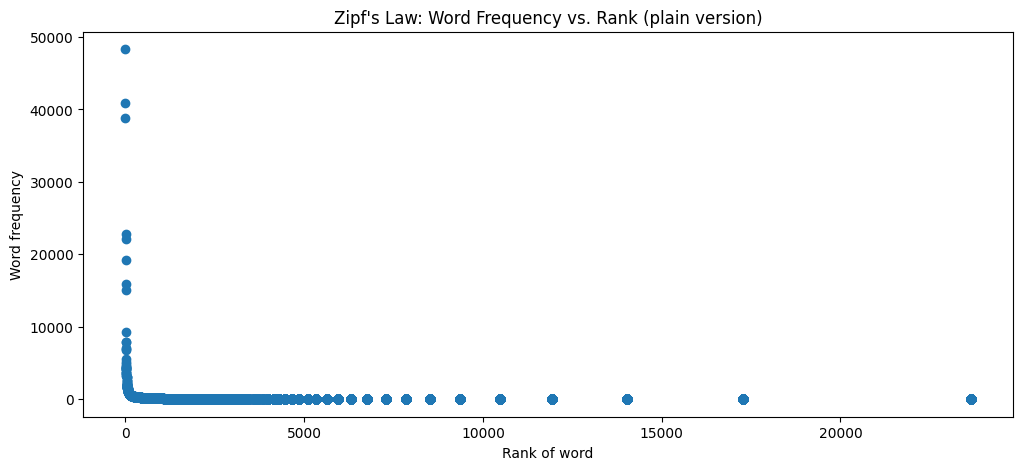

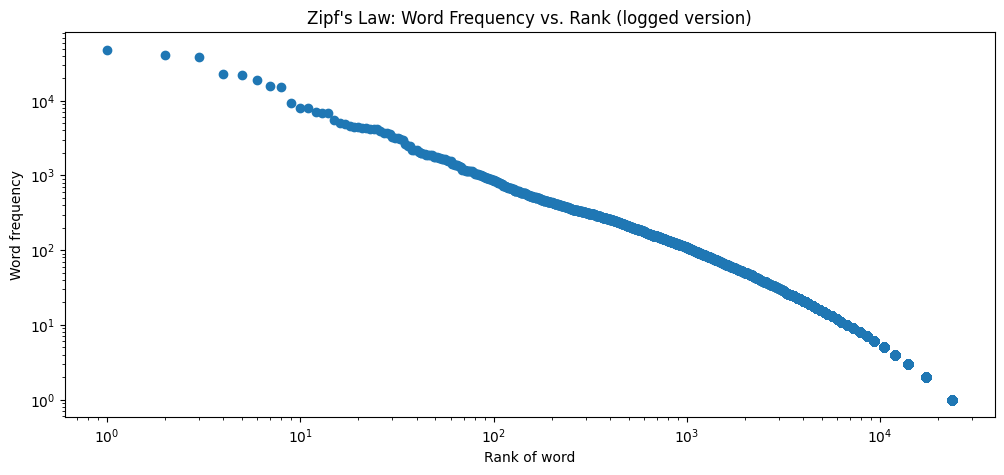

In [ ]:
## YOUR CODE HERE ##

sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True) # Sorting the words in decreasing order

# Initializing the variables that we need

ranks = {}
current_rank = 1
previous_freq = None

# Create the ranks to plot

for i, (word, freq) in enumerate(sorted_words, start=1):
    if freq == previous_freq:
        ranks[word] = current_rank
    else:
        current_rank = i
        ranks[word] = current_rank

    previous_freq = freq


rank_values = list(ranks.values())
frequencies = [freq for _, freq in sorted_words]



# Plotting rank vs. frequency (raw version)
plt.figure(figsize=(12, 5))
plt.plot(rank_values, frequencies, marker='o', linestyle='none')
plt.xlabel("Rank of word")
plt.ylabel("Word frequency")
plt.title("Zipf's Law: Word Frequency vs. Rank (plain version)")
plt.show()


# Plotting rank vs. frequencyn (logged version). Logging the data is better for visualizing purposes
plt.figure(figsize=(12, 5))
plt.plot(rank_values, frequencies, marker='o', linestyle='none')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Rank of word")
plt.ylabel("Word frequency")
plt.title("Zipf's Law: Word Frequency vs. Rank (logged version)")
plt.show()


█████ ANSWER UNDER THIS LINE █████

The corpus seems to obey the Zipf's law. In fact, there are a few words that dominate the corpus, while as soon as the rank increases, the frequency of the word plunges dramatically.

This is even more clear if one considers the logged version of the data, which are preferable for visualising purposes. As one can see from the shape of the line, words' frequencies are inversely proportional to their rankings: i.e., most frequent words have the lowest rankings.

### (b) Tags & tokens [5pt]

**Print** a list of the **10 most commonly occurring POS tags** in the data. For each of these POS tags, additionally **print** the **3 most common token types** (i.e., words) that belong to that tag. Print raw counts for each printed tag and token type.

In [ ]:
## YOUR CODE HERE ##


# Initializing the variables

pos_counts = Counter()
pos_words = defaultdict(Counter)

with open(train_file, 'r', encoding='utf-8') as f: # Reading the file
    for line in f:
        line = line.strip()
        if not line:
            continue

        tokens = line.split()
        for token in tokens:
            if '|' not in token:
                continue

            word, pos = token.rsplit('|', 1)
            pos_counts[pos] += 1 # Increasing the POS tag counter
            pos_words[pos][word] += 1 # Increasing the counter for each couple POS tag - word

top_tags = pos_counts.most_common(10) # Getting the 10 most common POS tags

for pos, count in top_tags: # For each most common POS tag we generate the 3 most common words and print them
    top_words = pos_words[pos].most_common(3)
    top_words_str = "; ".join(f"{word}({wcount})" for word, wcount in top_words)
    print(f"{pos} ({count}):\t{top_words_str}")

# Use the following printing format and test your numbers for the DT pos tag:
# DT (82147):	the(40831); a(19151); The(6753)

NN (132134):	%(4866); company(2457); year(2220)
IN (99413):	of(22778); in(14852); for(7907)
NNP (90711):	Mr.(4147); U.S.(1577); Corp.(1186)
DT (82147):	the(40831); a(19151); The(6753)
JJ (59643):	new(1396); other(1298); last(990)
NNS (59332):	years(1164); shares(1128); sales(939)
, (48314):	,(48310); an(1); 2(1)
. (39252):	.(38798); ?(392); !(62)
CD (36148):	million(4355); billion(1780); one(1203)
RB (30232):	n't(3211); also(1420); not(1287)


### (c) Ambiguity [6pt]

A single token type (i.e. word) may occur with several POS tags. For example, *record* can be both a **noun** *(buy a record)* or a **verb** *(record a lecture)*. This makes POS tags extremely useful for **disambiguation**.

**Print** the percentage(!) of the **ambiguous** words in the vocabulary(!) (i.e. token types that have more than one POS tag?).  

Ambiguous words do not account for a great percentage of the vocabulary. Yet they are among the most commonly occurring words in the English language.  
**Print** the percentage of the dataset that is ambiguous (i.e., counting tokens of ambiguous token types/words wrt data size).  
(Don't round percentages when printing)

**Print** the **10 most frequently shared POS tag pairs** (i.e. POS tag pairs that share most words).  
**Print** the **4 most ambiguous** words (i.e. based on the number of POS tags it can get)

In [ ]:
## YOUR CODE HERE ##

# Initializing the variable that i need

word2pos = defaultdict(set)
tokens = []

with open(train_file, encoding='utf-8') as f: # Opening the file and reading it
    for line in f:
        line = line.strip()
        if not line:
            continue

        words = line.split()
        for token in words:
            if '|' not in token:
                continue
            tokens.append(token)

total_tokens = len(tokens)

for tok in tokens:
    word, pos = tok.rsplit('|', 1)
    word2pos[word].add(pos)

# Identify ambiguous words (more than one POS tag) and compute the percentual

ambiguous = {w for w, ps in word2pos.items() if len(ps) > 1}
ambig_word_pct = len(ambiguous) / len(word2pos) * 100

# Count ambiguous tokens and compute the percentual
ambig_token_count = sum(1 for tok in tokens if tok.rsplit('|', 1)[0] in ambiguous)
ambig_token_pct = ambig_token_count / total_tokens * 100

# Computing POS pair frequencies for ambiguous words
pair_counts = Counter(
    pair
    for w in ambiguous
    for pair in combinations(sorted(word2pos[w]), 2)
)

# Extracting the top POS tag pairs and ambigous words
top_pairs = pair_counts.most_common(10)
top_words = sorted(word2pos.items(), key=lambda x: -len(x[1]))[:4]

# Printing results

print(f"Ambiguous words: {ambig_word_pct}% of vocabulary")
print(f"Ambiguous tokens: {ambig_token_pct}% of corpus")

print("\nTop POS tag pairs:")
for (p1, p2), cnt in top_pairs:
    print(f"{p1}-{p2}: share {cnt} tokens")

print("\nTop ambiguous words:")
for w, ps in top_words:
    print(f"{w}: {', '.join(sorted(ps))}")


# TEST: There are 1060 token types whose tokens get both ('VBD', 'VBN') tags
# TEST: in other words, a set of tokens with VBD and a set of tokens with VBN share 1060 elements

# print in the following way:
# Print ambiguous tokens and tag pairs as, where tags are ordered alphabetically:
# Top 10 confused tag pairs:
#	('VBD', 'VBN') share 1060 tokens
#   ...
#
# Top 4 ambiguous tokens:
# 	token: [POS_1, ..., POS_n]
#   ...


Ambiguous words: 13.469803211942999% of vocabulary
Ambiguous tokens: 55.079005800643756% of corpus

Top POS tag pairs:
VBD-VBN: share 1060 tokens
JJ-NN: share 962 tokens
NN-VB: share 775 tokens
VB-VBP: share 752 tokens
NN-NNP: share 627 tokens
JJ-VBN: share 456 tokens
NN-VBP: share 403 tokens
NN-VBG: share 378 tokens
NNS-VBZ: share 364 tokens
JJ-NNP: share 297 tokens

Top ambiguous words:
set: JJ, NN, VB, VBD, VBN, VBP, VBZ
many: DT, JJ, NN, NP, PDT, RB, VB
open: JJ, NN, RB, RP, VB, VBP, VBZ
down: IN, JJ, NN, RB, RBR, RP, VBP


### (d) Explain [6pt]

**Take one** of the 4 most ambiguous words and for **each** of its possible POS tags **give** a sentence/phrase from the **training data** that shows the use of the token with its POS tag.  
For the other **three** words, **pick** one POS tag that seems to you least likely for the word and give the corresponding sentence/phrase from the training data.  
From these seven examples, **discuss** those that you find it somewhat surprisong or unexpected, supporting your response with reasoning.      
Consult [Figure 17.2](https://web.stanford.edu/~jurafsky/slp3/17.pdf#page=4) for the interpretation of the POS tags. If you would like a more detailed explanation of the POS tags, consult [this technical report](http://www.cs.cmu.edu/afs/cs/Web/People/dgovinda/pdf/semantics/tagguide.pdf). Of course, you don't need to read it entirely, just use it to search for certain POS tags in it.

In [ ]:
# Optional code cell for searching certain toke-tag pairs in the training data

█████ ANSWER UNDER THIS LINE █████

We select the word: 'set'. We now report a sentence for each of its POS tags:
- JJ: A futures contract is an agreement to buy or sell a commodity or financial instrument at a set price on a specified date.
- NN: Just the thing for the Vivaldi-at-brunch set, the yuppie audience that has embraced New Age as its very own easy listening.
- VB: The National Transportation Safety Board ruled that pilots failed to set the plane's wing flaps and slats properly for takeoff and failed to make mandatory preflight checks that would have detected the error.
- VBD: Mr. Pearce set up GM's first in-house litigation group in May with four lawyers, all former assistant U.S. attorneys with extensive trial experience.  
- VBN: A record date hasn't been set.
- VBP: Another finding from the study: Prosecutors set significantly different priorities.
- VBZ: Dreyfus moved to the $1 price after the SEC set standards -- an average 120-day maturity of high-grade paper -- that are still the rule.

As for the word 'many', the less likely POS tag is VB 'verb base'. Example: Elected to Congress in 1978, the 48-year-old Mr. Courter is part of a generation of young conservatives who were once very much in the lead of the rightward shift under Mr. Reagan. -- We wish to highight that in this case the POS tag is worngly assigned to the word 'many': i.e. in this sentence 'many' does not serve as a verb.

As for the word 'open', the less likely POS tag is RP 'particle'. Example: All major roadways except Interstate 880, known as the Nimitz Freeway, and the Bay Bridge were open by 1 p.m. yesterday. -- We wish to highight that in this case the POS tag is worngly assigned to the word 'open': i.e. in this sentence 'open' does not serve as a particle.

As for the word 'down', the less likely POS tag is VBP 'verb non-3sg-pr'. Example: Because hurricanes can change course rapidly, the company sends employees home and shuts down operations in stages -- the closer a storm gets, the more complete the shutdown. -- We wish to highight that in this case the POS tag is worngly assigned to the word 'down': i.e. in this sentence 'open' does not serve as a verb non-3sg-pr.

We are now goint to discuss the most interesting and/or unexpected examples for the word 'set'.
As a start, we did not espect to find the POS tag VBZ (verb 3sg pres). In fact, in such case the verb would include (for grammar reasons) a final 's'. However, in the reported example the verb is indeed at the third person, but also at the past tense (which of course does not need a final 's' for the third sing. person). Still, we would have aspect this case to fall under the VBD POS tag (verb past tense) instead of under the VBZ tag.
The other examples are quite predictable, perhaps we would expect the first example reported by us (POS tag JJ) to fall under the tag VBN (verb past participle). However, the JJ tag seems to gather well the function of the word 'set' in the sentence, since the past particle in this case serves as an adjective.

## Ex 1.2 [8pt]

You are also provided with another file called **sec00.gold.tagged**.
Section 00 of the Penn Treebank is typically used as development data.

### (a) Unseen % [5pt]

**Print** the percentages and the raw count of the **unseen development vocabulary** and **unseen development data** (i.e., token types and tokens that occur in the development data but not in the training data). Percentages should be calculated wrt the development vocabulary/data size and they shouldn't be rounded.

In [ ]:
## YOUR CODE HERE ##


dev_file = PTB_FILES['dev']

# Initializing the variables

new_tokens = list()
new_tokens_count = 0
new_vocab = set()

unseen_vocab = set()
unseen_tokens_count = 0
token_pos_list = [] # This is useful for the following exercize

with open(dev_file, 'r', encoding='utf-8') as f: # Same proceedure to read through the file
    for line in f:
        line = line.strip()
        if not line:
            continue

        tokens = line.split()

        for token in tokens:
            if '|' not in token:
                continue
            word, pos = token.rsplit('|', 1)
            new_vocab.add(word)
            new_tokens.append(word)
            token_pos_list.append((word, pos))  # This is useful to record the POS tags for the following exercise

# Getting the unsees words
unseen_vocab = new_vocab - vocab
unseen_vocab_percentage = (len(unseen_vocab) / len(new_vocab))*100 # Calculating the percentage


for token in new_tokens:
  if token not in vocab:
    unseen_tokens_count += 1 # Increasing the count of unseen tokens for each token that is not in the old vocabulary

unseen_tokens_percentage = (unseen_tokens_count / len(new_tokens))*100 # Calculating the percentage


# Printing the results

print(f"Unseen vocabulary raw count: {len(unseen_vocab)}")
print(f"Unseen vocab percentage {unseen_vocab_percentage}%")

print(f"Unseen tokens raw count: {unseen_tokens_count}")
print(f"Unseen vocab percentage {unseen_tokens_percentage}%")


# Use PTB_FILES global var
# print as
# Unseen vocab percentage = X1% (X2)
# Unseen data percentage = Y1% (Y2)
# TEST: Difference between the percentages (X1-Y1) should be in the interval 10-15%

Unseen vocabulary raw count: 1288
Unseen vocab percentage 16.34932724041635%
Unseen tokens raw count: 1728
Unseen vocab percentage 3.804323895909471%


### (b) Unseen tok tag [3pt]

**Print** the top **five** POS tags that the most **unseen tokens** belong to.

In [ ]:
## YOUR CODE HERE ##

# Initializing the variables

pos_unseen_counts = {}

for word, pos in token_pos_list:
    if word not in vocab:
        pos_unseen_counts[pos] = pos_unseen_counts.get(pos, 0) + 1

sorted_pos = sorted(pos_unseen_counts.items(), key=lambda item: item[1], reverse=True) # Sorting unseen postags in decreasing order

top5 = sorted_pos[:5] # Get the first 5


# Printing the results

for pos_tag, cnt in top5:
    print(f"{pos_tag} ({cnt})")



# Print in the following format:
# POS_tag (the_number_of_corresponding_unseen_tokens)

NNP (815)
JJ (258)
NN (210)
NNS (146)
CD (114)


## Work description for Ex 1

~~Describe your approach to solving the exercises, for example, what steps you took first, followed by subsequent actions, which parts you found most challenging or easy, any specific helpful assistance received from TAs, whether you used GenAI, to what extent, at what stage, which one, how helpful was it, etc.~~

YOUR ANSWER HERE [100-200 words]

We began by reviewing the theory behind POS tags, Zipf's law and corpus analysis. Initially, we looked at the dataset to understand its structure and logic. Then, each person programmed specific exercises and everyone reviewd and checked each other work.

While programming, we did use genAI (in particular ChatGPT and Copilot) in order to: get hints on how to set the code, check the syntax, fix bugs and occasionally generate some lines of code. For this first part of the assignment we did not ask any help to the teacher assistent.

We found exercise 1.1 c to be the most challenging, since we sturggled to understand which logic to apply for solving it.

# 2. Language Models



The following questions presuppose J&M's [chapter 3 on n-gram language models](https://web.stanford.edu/~jurafsky/slp3/3.pdf).

Models that assign **probabilities** to **sequences of words** are called **language
models** or **LMs**. The simplest model that assigns probabilities to sentences and sequences of words is the **N-gram** model.

Recall that an *N*-gram language model uses **conditional probabilities** of the form
    
$$P(w_k \mid w_{k-N+1} \dots w_{k-1})$$

to **approximate** the full **joint probability**

$$P(w_1 \dots w_n)$$

of a sequence of words $w_1 \dots w_n$.

The easiest way of obtaining estimates for the probabilities $P(w_k \mid w_{k-N+1} \dots w_{k-1})$ is to use the **maximum likelihood estimate** or **MLE**, a widely used statistical estimation method ([read more](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)). You count and normalize:

$$P_{MLE}(w_k \mid w_{k-N+1} \dots w_{k-1}) = \frac{C(w_{k-N+1} \dots w_{k-1} w_k)}{C(w_{k-N+1} \dots w_{k-1})}.$$

## Ex 2.1 [15pt]

In this exercise you will have to train $N$-gram language models with an optional smoothing.

#### Some help

The `collections` library has another useful data structure: the `defaultdict`. Some example uses (learn more [here](https://realpython.com/python-defaultdict/) if needed):

**[Datastructure hint]** If you store the smoothed language in a naive manner (that is, to store *all* the numbers separately) your datastructure will get huge! If $V$ is the vocabulary then the smoothed bigram model assigns probabilities to $|V|^2$ entries. If $|V|$ is around 80k, the naive way requires you to store more than 64 billion floats. Yet almost all of these are actually just $P(w_n|w_{n-1}) = \frac{k}{N + k|V|}$, with $k$ the value with which you smooth and $N=C(w_{n-1})$. Think about how you use this fact to make your model work in practice.

In [ ]:
from collections import defaultdict

d = defaultdict(float)
d["new key"]

0.0

Compare that to an ordinary dictionary:

In [ ]:
# d = dict()
# d["new key"]
# Throws an KeyError: 'new key'

Other datatypes as `default_factory`:

In [ ]:
d = defaultdict(int)
print(d)
print(d["new key"])
print(d)

defaultdict(<class 'int'>, {})
0
defaultdict(<class 'int'>, {'new key': 0})


In [ ]:
d = defaultdict(list)
print(d)
print(d["new key"])
print(d)

defaultdict(<class 'list'>, {})
[]
defaultdict(<class 'list'>, {'new key': []})


Note how the defaultdict is modified after getting a value of a non-existing key. If you want to avoid modifying the defaultdict when getting a value for a non-existing key, do the following:

In [ ]:
d = defaultdict(list)
print(d)
print(d.get("new key", d.default_factory()))
print(d)

defaultdict(<class 'list'>, {})
[]
defaultdict(<class 'list'>, {})


Converting an already existing `dict`:

In [ ]:
d1 = {k: "value" for k in range(1, 11)}
d = defaultdict(float, d1) # convert it to a defaultdict
print(d[5])
print(d[100])

value
0.0


This doesn't work:

In [ ]:
# d = defaultdict(10)
# Throws a TypeError: first argument must be callable or None

Use a `lambda` to make the number `10` `callable`":

In [ ]:
d = defaultdict(lambda: 10)
print(d)
print(d["new key"])
print(d)

defaultdict(<function <lambda> at 0x79fc3d2ffec0>, {})
10
defaultdict(<function <lambda> at 0x79fc3d2ffec0>, {'new key': 10})


In [ ]:
d = defaultdict(lambda: defaultdict(float))
print(d)
print(d["new key"])
print(d)

defaultdict(<function <lambda> at 0x79fc3d2ff7e0>, {})
defaultdict(<class 'float'>, {})
defaultdict(<function <lambda> at 0x79fc3d2ff7e0>, {'new key': defaultdict(<class 'float'>, {})})


Note that in some cases the behaviour of lambda functions might be counterintuitive. One of such cases is the closure: [link1](https://realpython.com/python-lambda/#closure), [link2](https://stackoverflow.com/questions/2295290/what-do-lambda-function-closures-capture).

In [ ]:
# making a shortcut for the read-only get for defaultdict that supports several keys
# i.e. defget(d, [k1, k2]) will return the value of d[k1][k2] without altering d
def defget(d, keys):
    for k in keys:
        d = d.get(k, d.default_factory() if isinstance(d, defaultdict) else 0)
    return d

# testing if it works as intended
d = defaultdict(lambda: defaultdict(int))
d[1][1] = 2
d[2][1] = 3
print(d)
print(defget(d, [1, 1]))
print(defget(d, [3]))
print(defget(d, [3, 1]))
print(d)

defaultdict(<function <lambda> at 0x79fc3d2fe160>, {1: defaultdict(<class 'int'>, {1: 2}), 2: defaultdict(<class 'int'>, {1: 3})})
2
defaultdict(<class 'int'>, {})
0
defaultdict(<function <lambda> at 0x79fc3d2fe160>, {1: defaultdict(<class 'int'>, {1: 2}), 2: defaultdict(<class 'int'>, {1: 3})})


Clever use of a `defaultdict` can be the solution to the problem of data-storing in a smoothing $N$-gram pointed out above:
    
    d = bigram_frequencies[history] = {w1: 120, w2: 340, w3: 7 ...}
    N = sum(d.values())
    # d_normalized = .... # normalize d with smoothing applied to elements already in the dictionary  
    d_smoothed = defaultdict(lambda: k/(N + kV), d_normalized) # add smoothing to 'unseen' words

The following function is given to assist you with reading the data from the file in a convenient format. Understand how the function works and figure out how to use it for training n-grams.

Note that the function uses padding symbols `<s>` and `</s>` to mark sentence boundaries. **When doing smoothing, include `</s>` in the vocabulary (and unigram models)**, otherwise after smoothing certain conditional probabilities will sum up higher than 1.  
🤔 It is a good practice to think of why this would be the case.  

In [ ]:
def read_data(fname, h=1, max_lines=np.inf):
    """
    Reads in the data from a file and returns a vocabulary as a set
    and the sentence-padded data as a list of list.

    :param fname: path to the file
    :param max_lines: the number of top lines to read (can be used for debugging)
    :param h: the length of n-gram history
    :returns: data as a list of lists and vocabulary as a set
    """
    data = []
    start = h * ["<s>"]
    end = ["</s>"]

    with open(fname, "r") as F:
        for k, line in enumerate(F):
            # an optional cut-off to read a part of the data
            if k > max_lines:
                break
            words = line.strip().split()
            # padding the sentence
            sent = start + words + end #for h=0 add no ending
            data.append(sent)
    return data

### train_ngram

**Complete** the function `train_ngram` so that you can train a count-based $N$-gram language model on the data found in `data/ted-train.txt` and train this for $N=2,3$.

**Extend** the function `train_ngram` so that it accepts a parameter `k` for optional add-$k$ smoothing (upgrade the same function, don't define new). For smoothing, in case of histories unseen in the data, use the unigram model instead of the uniform distribution.

Both `ngram` and `unigram` should be a defaultdict of defaultdict because it should return a value for any history and for any next word combination.

In [ ]:
def train_ngram(data, N=2, k: float = 0.0):
    """
    Trains an n-gram language model with optional add-k smoothing
    and additionally returns the unigram model

    :param data: text-data as returned by the pre-defined function read_data
    :param N: (N>1) the order of the ngram e.g. N=2 gives a bigram
    :param k: optional add-k smoothing
    :returns: ngram and unigram
    """
    # ngram[history][word] = #(history,word)
    # for history of length >1, join tokens with a singel white space (see tests below)

    ## YOUR CODE HERE ##
    ## you can have auxiliary functions if needed, inside this function

    # Initializing the variables that we need
    counts = defaultdict(Counter) # To store n-gram counts
    unigram_counts = Counter() # To store unigram count (individual words)
    vocab = set()

    for sent in data:

        # Counting the n-grams

        for i in range(len(sent) - N + 1):
            hist = " ".join(sent[i : i + N - 1])
            word = sent[i + N - 1]
            counts[hist][word] += 1

        # Counting unigrams

        for tok in sent:
            if tok != "<s>":  # We ignore '<s>'
                unigram_counts[tok] += 1
                vocab.add(tok)

    # Initializing more variables

    V = len(vocab)
    uni_total = sum(unigram_counts.values())

    # Computing unigram probabilities

    uni_default = (k / (uni_total + k * V)) if k else 0.0
    unigram = defaultdict(lambda: uni_default)
    for w, c in unigram_counts.items():
        unigram[w] = (c + k) / (uni_total + k * V) if k else c / uni_total # We use the unigram model instead of the uniform distribution

    # Computing n‑gram probabilities with an auxiliar function

    def make_hist_prob(hist_counter):
        total = sum(hist_counter.values())
        default_p = (k / (total + k * V)) if k else 0.0
        prob = defaultdict(lambda: default_p)
        if k:
            for w, c in hist_counter.items():
                prob[w] = (c + k) / (total + k * V)
        else:
            for w, c in hist_counter.items():
                prob[w] = c / total
        return prob

    ngram_seen = {}

    for h, cnt in counts.items():
        hist_prob = make_hist_prob(cnt)
        ngram_seen[h] = hist_prob

    ngram = defaultdict(lambda: unigram, ngram_seen)

    return ngram, unigram

In [ ]:
# This shouldn't take more than 2min
Data1 = read_data(TED_FILES['train'], h=1) ## YOUR CODE HERE ##
# use the global variable for the file path
# non-smoothed bigram
Bigram, Unigram = train_ngram(Data1, N=2, k=0)
# smoothed bigram
Bigram_sm, Unigram_sm = train_ngram(Data1, N=2, k=1)

In [ ]:
# Running this might take significant amount of memory
# Runtime shouldn't take more than 3min
Data2 = read_data(TED_FILES['train'], h=2) ## YOUR CODE HERE ##
# non-smoothed trigram
Trigram, Unigram_ = train_ngram(Data2, N=3, k=0)
# smoothed trigram
Trigram_sm, Unigram_sm_ = train_ngram(Data2, N=3, k=1)

In [ ]:
#TEST 2.1
# Be aware that when getting a value of a non-existing key from defaultdict with d[key] method,
# the key gets inserted into the defaultdict. That's why tests use defget
assert defget(Bigram, ['all','people']) > 0
assert defget(Bigram, ['all','all']) == 0
assert defget(Bigram_sm, ['all','all']) == defget(Bigram_sm, ['all','asdasda'])
assert defget(Bigram_sm, ['all','asdasda']) > 0
assert defget(Trigram, ['<s> <s>','The']) > 0
assert defget(Trigram, ['<s> <s>','sun']) == 0
assert np.isclose(sum(Trigram['All the'].values()), 1) #almost 1, but not 1 because of float point rounding
assert defget(Trigram_sm, ['<s> <s>','sun']) > 0
assert defget(Unigram, ['</s>']) > 0
assert Unigram == Unigram_
assert Unigram_sm == Unigram_sm_

## Ex 2.2 [5pt]

You can use an *N*-gram language model to **generate text**. The higher the order *N* the better your model will be able to catch the long-range dependencies that occur in actual sentences and the better your chances are at generating sensible text. But beware: **sparsity** of language data will quickly cause your model to reproduce entire lines from your training data; in such cases, only one $w_k$ was observed for the histories $w_{k-N+1}\dots w_{k-1}$ in the entire training set.

### Some help

**[Hint]** You can use the method of [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) to generate a sample from a **categorical distribution**, $p_1\dots p_k$ such that $p_i \geq 0$ and $\sum_{i=1}^k p_i = 1$, as follows:

In [ ]:
import random

P = [0.2,0.5,0.2,0.1]

def sample(P):
    u = random.random() # random number between 0 and 1
    p = 0
    for i, p_i in enumerate(P):
        p += p_i
        if p > u:
            return i # the first i s.t. p1 + ... + pi > u

print(sample(P))

print(Counter([sample(P) for i in range(1000)])) # check to see if the law of large numbers is still true

2
Counter({1: 510, 2: 203, 0: 197, 3: 90})


Inverse transform sampling in the words of Jurafsky and Martin:

> Imagine all the words of the English language covering the probability space
between 0 and 1, each word covering an interval proportional to its frequency. We
choose a random value between 0 and 1 and print the word whose interval includes
this chosen value.

(J&M, [section 3.3](https://web.stanford.edu/~jurafsky/slp3/3.pdf#page=10))

### generate_sent

**Complete** the function `generate_sent`. It takes a language model `lm` and an order `N` and should generate a **natural language string(!)** (it shouldn't contain padding symbols and might not be a grammatical sentence) by **sampling** from the language model.

In [ ]:
def generate_sent(lm, N):
    """
    Generates sentence from a language model based on N-grams
    :param lm: language model based on N-grams
    :param N: denoting N-gram parameter
    :returns: a string of natural language text
    """

    ## YOUR CODE HERE ##
    ## you can have auxiliary functions if needed, inside of outside this function's scope

    # Initializing the variables

    history = ' '.join(['<s>'] * (N-1))
    result = []

    # The code keeps generating until the end symbol

    while True:

        # Get distribution for the current history

        probs = lm[history]

        # Get all possible next words and their probabilities

        words = list(probs.keys())
        probabilities = [probs[w] for w in words]

        # Sample from the distribution

        if not words:  # If there are no continuations we break
            break

        # Implement inverse transform sampling
        u = random.random()
        cumulative_prob = 0
        selected_word = None

        for word, prob in zip(words, probabilities):
            cumulative_prob += prob
            if cumulative_prob > u:
                selected_word = word
                break

        # If sampling somehow failed, we break

        if selected_word is None:
            break

        # Add the word to result if it's not a sentence end symbol

        if selected_word != '</s>':
            result.append(selected_word)
        else:
            break

        # Update history for next iteration

        if N > 1:
            history_words = history.split()
            if len(history_words) >= N-1:
                history_words = history_words[-(N-2):] if N > 2 else []
            history_words.append(selected_word)
            history = ' '.join(history_words[-(N-1):])

    return ' '.join(result)

In [ ]:
#TEST Ex2.2
random.seed(2025) #uncommnet if you want to make the output non-deterministic

print("Bigram:\n")
print("\n".join([generate_sent(Bigram, 2) for _ in range(5)]))

print("\nTrigram:\n")
print("\n".join([generate_sent(Trigram, 3) for _ in range(5)]))

Bigram:

So this because I 'm bound in the night , he presented today .
So that I see me descriptions like an origin of fixing bridges .
In our millennial generation , ecology , I decided I swear I 'd ask , every apartment .
If they allow him in her up .
The answer is more .

Trigram:

Now , how did I choose the spoken word that I could be an independent newspaper , no , no problem .
I saw this , and to start with us , not what I told you earlier -- that Winnie Mandela .
' My buddy .
Every old curator who 'd gone about as accurately as possible , are you .
♫ Sweeney : Oh , the fight for your attention .


### [Extra]
No points for this

For how many of the histories $w_{k-N+1}\dots w_{k-1}$ is the number of continuations $w_n$ equal to **one**? Calculate the percentage of such cases for the different orders *N*.

And which history has the **most possible continuations**?

In [ ]:
## YOUR CODE HERE ##

█████ ANSWER UNDER THIS LINE █████

## Ex 2.3 Train sent. prob. [5pt]

**Recall** that if we have a sentence $w_1,\dots,w_n$ we can write

$$P(w_1\dots w_n) = P(w_1)P(w_2|w_1) \cdots P(w_n|w_1 \dots w_{n-1}) \approx P(w_1)P(w_2|w_1)\cdots P(w_n|w_{n-(N-1)}\dots w_{n-1})\prod_{i=1}^{n} P(w_i|w_{i-(N-1)}\dots w_{i-1})$$

where in the last step we make an $N$-gram approximation of the full conditionals.

For example, in the case of a bigram (N=2), the above expression reduces to

$$P(w_1 \dots w_n)\approx P(w_1)\prod_{i=2}^{n} P(w_i| w_{i-1}).$$

The following sentences are taken from the **training data**. Use your **unsmoothed unigram**, **bigram**, and **trigram** language model to estimate their **probabilities**:

    1. Every day was about creating something new .
    2. In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy .

In [ ]:
def sent_prob(sent, lm, N):
    """
    Calculates probability of sent based on the N-gram language mode lm
    :param sent: tokenized sentence string
    :param lm: N-gram language model
    :param N: N-gram size
    :returns: probabilitity number
    """
    ## YOUR CODE HERE ##

    # Splitting the sentence in tokens and seting the probability to a default value

    tokens = sent.split()
    prob = 1.0

    for i in range(len(tokens)):
        current_word = tokens[i]

        if N == 1:  # We don't consider the history for unigrams
            history = ""
        else:
            start_idx = max(0, i - (N - 1))
            history_words = tokens[start_idx:i]
            history = " ".join(history_words)

        # Getting the probability of the current word given the history

        if N == 1:
            word_prob = lm[current_word] # For unigrams, just use the word probability
        else:
            word_prob = lm[history][current_word] # For n-grams, get probability for the ngram model

        prob *= word_prob


    return prob

In [ ]:
# Print all the abovemnetioned probabilities (NOT log probabilities).
# The cell output should make it clear what number stands for which probability.
# Reuse the variables Unigram, Unigram_sm, Bigram, Bigram_sm, Trigram, and Trigram_sm.
# Note that sent_prob should take a sentence input as a string, not as a list.

Sents_from_train = (
    "Every day was about creating something new .",
    "In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy ."
)

## YOUR CODE HERE ##

# Calculate and print probability for each sentence

for i, sent in enumerate(Sents_from_train, 1):
    print(f"\nSentence {i}: '{sent}'")

    # Unigram probabilities
    uni_prob = sent_prob(sent, Unigram, 1)
    uni_sm_prob = sent_prob(sent, Unigram_sm, 1)
    print(f"Unigram probability (unsmoothed): {uni_prob:.4g}") # 4 significant digits, g is "general number" (e)
    print(f"Unigram probability (smoothed): {uni_sm_prob:.4g}")

    # Bigram probabilities
    bi_prob = sent_prob(sent, Bigram, 2)
    bi_sm_prob = sent_prob(sent, Bigram_sm, 2)
    print(f"Bigram probability (unsmoothed): {bi_prob:.4g}")
    print(f"Bigram probability (smoothed): {bi_sm_prob:.4g}")

    # Trigram probabilities
    tri_prob = sent_prob(sent, Trigram, 3)
    tri_sm_prob = sent_prob(sent, Trigram_sm, 3)
    print(f"Trigram probability (unsmoothed): {tri_prob:.4g}")
    print(f"Trigram probability (smoothed): {tri_sm_prob:.4g}")


Sentence 1: 'Every day was about creating something new .'
Unigram probability (unsmoothed): 5.712e-24
Unigram probability (smoothed): 5.114e-24
Bigram probability (unsmoothed): 2.534e-18
Bigram probability (smoothed): 1.218e-27
Trigram probability (unsmoothed): 4.637e-15
Trigram probability (smoothed): 1.161e-33

Sentence 2: 'In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy .'
Unigram probability (unsmoothed): 5.797e-99
Unigram probability (smoothed): 8.699e-99
Bigram probability (unsmoothed): 1.077e-73
Bigram probability (smoothed): 1.367e-117
Trigram probability (unsmoothed): 2.81e-33
Trigram probability (smoothed): 9.824e-135


**Repeat** this with the **smoothed (add-1)** versions of the N-grams (in the same above code cell).   
**What** is the effect of smoothing on the probabilities and **how** the effect compare across the different $N$-grams models? Provide explanations for the effect and the comparison.

█████ ANSWER UNDER THIS LINE █████

The smoothing seems generally to decrease sentence probabilities. This is because the smoothing process consists in redistributing probability mass to unseen N-grams, preventing zero probabilities. This effect affects more bigrams and especially trigrams, since they rely on rarer word sequences. As an example, in Sentence 1, trigram probabilities drop significantly (from 4.637e-15 to 1.161e-33), while unigrams show a smaller decrease (from 5.712e-24 to 5.114e-24). This is due to the fact that unigrams depend only on individual word frequencies; on the contrary, bigrams and trigrams, which model word dependencies and hence represent rarer word sequencies, are reducted to a greater extent.

## Ex 2.4 Test sent. prob. [3pt]

The above sentences were taken from the training set, hence they will all have a probability greater than 0. The big challenge for our language model are of course with the sentences that contain unseen N-grams: if such an N-gram occurs our model immediately assigns the sentence probability zero.

The following sentences are taken from the **test set** available in the file **ted-test.txt**.  
**Print** the probabilities of the sentences based on the smoothed and unsmoothed language models.

    1. Because these robots are really safe .
    2. We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality .

In [ ]:
# Print all the abovemnetioned probabilities.
# The cell output should make it clear what number stands for which probability.
# Reuse the variables Unigram, Unigram_sm, Bigram, Bigram_sm, Trigram, and Trigram_sm.
# Note that sent_prob should take a sentence input as a string, not as a list.

Sents_from_test = (
    "Because these robots are really safe .",
    "We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality ."
)
### YOUR CODE HERE ###

for i, sent in enumerate(Sents_from_test, 1):
    print(f"\nSentence {i}: '{sent}'")

    # Unigram probabilities
    uni_prob = sent_prob(sent, Unigram, 1)
    uni_sm_prob = sent_prob(sent, Unigram_sm, 1)
    print(f"Unigram probability (unsmoothed): {uni_prob:.4g}")
    print(f"Unigram probability (smoothed): {uni_sm_prob:.4g}")

    # Bigram probabilities
    bi_prob = sent_prob(sent, Bigram, 2)
    bi_sm_prob = sent_prob(sent, Bigram_sm, 2)
    print(f"Bigram probability (unsmoothed): {bi_prob:.4g}")
    print(f"Bigram probability (smoothed): {bi_sm_prob:.4g}")

    # Trigram probabilities
    tri_prob = sent_prob(sent, Trigram, 3)
    tri_sm_prob = sent_prob(sent, Trigram_sm, 3)
    print(f"Trigram probability (unsmoothed): {tri_prob:.4g}")
    print(f"Trigram probability (smoothed): {tri_sm_prob:.4g}")


Sentence 1: 'Because these robots are really safe .'
Unigram probability (unsmoothed): 2.232e-21
Unigram probability (smoothed): 2.029e-21
Bigram probability (unsmoothed): 1.868e-16
Bigram probability (smoothed): 8.29e-25
Trigram probability (unsmoothed): 0
Trigram probability (smoothed): 2.412e-30

Sentence 2: 'We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality .'
Unigram probability (unsmoothed): 1.042e-116
Unigram probability (smoothed): 1.019e-116
Bigram probability (unsmoothed): 0
Bigram probability (smoothed): 9.327e-128
Trigram probability (unsmoothed): 0
Trigram probability (smoothed): 5.049e-152


**Contrast** the smoothed and unsmoothed probabilities and **explain** the drastic changes (if any) in terms of unseen tokens and sequences.

█████ ANSWER UNDER THIS LINE █████

As observed in previous cases, smoothed probabilities are generally lower than unsmoothed ones, with the effect being more pronounced in higher-order n-grams. An important aspect to note is that, since this is the test set, it certainly contains unseen n-grams, particularly in bigrams and trigrams. Therefore, the unsmoothed probabilities for these sequences are zero, as they were not encountered in the training data. In contrast, smoothing prevents zero probabilities, ensuring that even unseen n-grams retain a small but nonzero probability. This effect is evident in Sentence 2, where bigram and trigram probabilities are zero in the unsmoothed case but are assigned extremely small values when smoothed.

### [Extra]

**Optional** What percentage of the sentences in the test set get assigned probability 0 under your smoothed and unsmoothed language models?

In [ ]:
### ANSWER HERE ###

## Ex 2.5 Perplexity [6pt]

**Perplexity** is a very frequently used **metric** for evaluating probabilistic models such as language models. The perplexity (sometimes called **PP** for short) of a language model on a sentence is the **inverse probability** of the sentence, **normalized** by the number of words:

$$PP(w_1 \dots w_n) = P(w_1\dots w_n)^{-\frac{1}{n}}.$$

Here we can again approximate $P(w_1 \dots w_n)$ with N-gram probabilities, as above.

Note: Calculation of perplexity has a resemblance with the **geometric mean** $(x_1\cdots x_n)^{-\frac{1}{n}}$ of the numbers $x_1,\dots,x_n$. It is like the (regular) arithmetic mean, but with **products** instead of **sums**. The geometric mean is a more natural choice in the case of *PP* because behind $P(w_1\dots w_n)$ is a series of $n$ products ([more here](https://en.wikipedia.org/wiki/Geometric_mean)).



Compute the perplexity of the sample sentences from the training and test data (`Sents_from_train` and `Sents_from_test` from Ex2.3-4) based on the smoothed bigram language model. It is recommended to use `sent_prob` from Ex 2.3.

What big difference between the **probabilities** of the sentences and the **perplexities** of the sentences do you notice?  
**Support** your answer with additional, stronger evidence, such as a plot based on more sentences or the entire data, and further **explain** the difference.


Sentence 1 of Sents_from_train: 'Every day was about creating something new .'
Bigram perplexity (smoothed): 2314

Sentence 2 of Sents_from_train: 'In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy .'
Bigram perplexity (smoothed): 4488

Sentence 1 of Sents_from_test: 'Because these robots are really safe .'
Bigram perplexity (smoothed): 2756

Sentence 2 of Sents_from_test: 'We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality .'
Bigram perplexity (smoothed): 2202


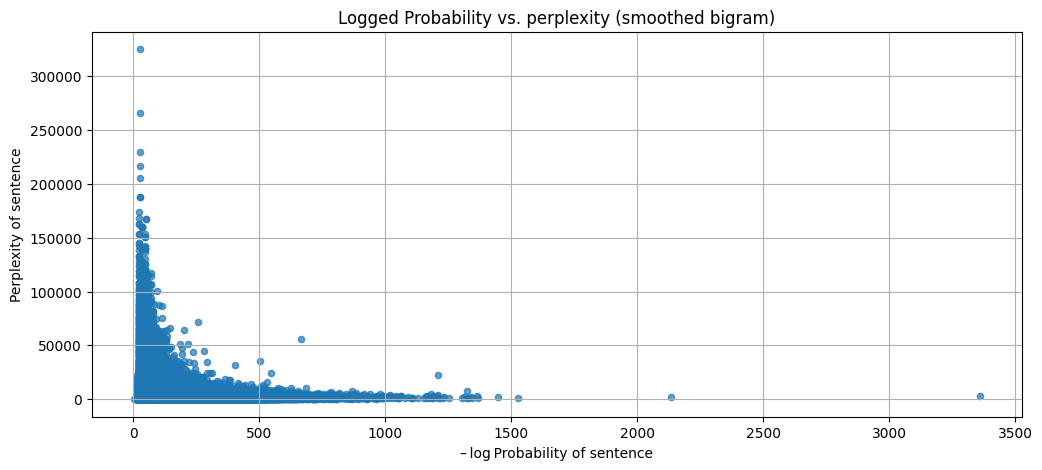

In [ ]:
# Feel free to reuse functions and variables form the previous exercises
# use Sents_from_train and Sents_from_test

### YOUR CODE HERE ###

import math

# Create a function to calculate perplexity

def sent_perplexity(sent, lm, N):
  prob = sent_prob(sent, lm, N)  # Using the sent_prob function
  n = len(sent.split())

  # Check if probability is zero to avoid division by zero

  if prob == 0:
    return float('inf')  # Return infinity for zero probability

  perplexity = prob ** (-1/n)  # Elevating it at -1/n
  return perplexity

# Per‑sentence perplexities for the provided examples

for i, sent in enumerate(Sents_from_train, 1):
    print(f"\nSentence {i} of Sents_from_train: '{sent}'")
    print(f"Bigram perplexity (smoothed): {sent_perplexity(sent, Bigram_sm, 2):.4g}")

for i, sent in enumerate(Sents_from_test, 1):
    print(f"\nSentence {i} of Sents_from_test: '{sent}'")
    print(f"Bigram perplexity (smoothed): {sent_perplexity(sent, Bigram_sm, 2):.4g}")

# Whole‑training‑set prob and PP analysis, for plotting purposes

# For visualizing purposes, we use a different formula to calculate PP based on log-prob

# Function for log-prob calculating

def sent_logprob(sent, lm, N):
    toks = sent.split()
    logp = 0.0
    for i, w in enumerate(toks):
        if N == 1:
            hist = None
            word_prob = lm[w]
        else:
            start = max(0, i - (N - 1))
            hist  = " ".join(toks[start:i])
            word_prob = lm[hist][w]
        logp += math.log(word_prob)
    return logp

# Calculating perplexity based on log‑probability

def sent_perplexity2(sent, lm, N):
    n = len(sent.split())
    return math.exp(-sent_logprob(sent, lm, N) / n)

# Function to read the file and store the sentences

def read_sentences_from_file(fn):
    with open(fn, encoding="utf‑8") as f:
        return [l.strip() for l in f]

training_sents = read_sentences_from_file(TED_FILES["train"])

# Storign the results in dictionary

sent_surprisal = {-sent_logprob(s, Bigram_sm, 2) : sent_perplexity2(s, Bigram_sm, 2)
                  for s in training_sents}

# Plotting probability vs perplexity

plt.figure(figsize=(12, 5))
plt.scatter(sent_surprisal.keys(), sent_surprisal.values(), s=20, alpha=0.7)
plt.xlabel("– log Probability of sentence")
plt.ylabel("Perplexity of sentence")
plt.title("Logged Probability vs. perplexity (smoothed bigram)")
plt.grid(True)
plt.show()


█████ ANSWER UNDER THIS LINE █████

Probability and perplexity represent different types of data. Probabilities range from 0 to 1 and measure the likelihood of a sentence, while perplexity quantifies uncertainty—a higher perplexity suggests that the model finds the sentence less predictable. As a general rule, sentences with lower probability tend to have higher perplexity. This pattern is evident in sentences 1 and 2 from the training set: Sentence 1 has a higher probability than Sentence 2, and therefore its perplexity is significantly lower.

By plotting probability versus perplexity for each sentence in the training set, the trend described above becomes even clearer. In fact, the shape of the plot suggests that logged probabilities and perplexities of the sentences are inversely proportional.


## Work description for Ex 2

~~Describe your approach to solving the exercises, for example, what steps you took first, followed by subsequent actions, which parts you found most challenging or easy, any specific helpful assistance received from TAs, whether you used GenAI, to what extent, at what stage, which one, how helpful was it, etc.~~

YOUR ANSWER HERE [100-200 words]

We started by looking at the theory of n-gram languange models and smoothing. Also in this part of the assignment, each person programmed different exercises individually and then we reveiwed and checked each other work, in particular as regards the most tricky exercises.

We did use genAI (again ChatGPT and Copilot) for the same purposes of the first part of the assignment, but to a greater extent. In particular, it helped setting the code for ex 2.1 and the second part of 2.5 (the calculation of probability and perplexity for the whole dataset) - which were the most challenging parts for us. We also relied on the help of the teacher assistent in order to understand the logic in exercise 2.1.



# That's it!

Congratulations, you have made it to the end of the tutorial. Here we will recap the gist of this notebook.

**Make sure all your cells can be executed and all your answers are there. Then, read on if you're interested!**

-----

By now you should have a solid feeling for the problem of **sparsity in language data**; there's just never enough data. For the task of language modelling, we saw that sparsity is a serious challenge.

It would be great to be able to model $p(w_n|w_1 \dots w_{n-1})$ for unlimited $n$: the larger $n$ the better our language model should become at capturing the long-range dependencies between words that characterize actual human sentences, and the more probability our model will assign to such sentences as opposed to sentences that are word-soup. But in the N-gram approach, increasing $n$ will quickly kill all generalizing abilities of the model: the model will start to assign probabilities only to sentences it has seen in the training data.

So, where to go from here? Here are three directions that we could head in.

### Smoothing

We have seen one example of smoothing in this lab: add-k smoothing. This is an easy method, both conceptually and implementation-wise. But the results are not great, and the effects it has on the distributions can be extreme.

A much more sophisticated method of smoothing is **Kneser-Ney smoothing**. The method is described in detail in section 4.5 of J&M (3rd edition). This is one of the best-performing N-gram smoothing methods, and up to a few years ago, a popular implementation of it called [KenLM](https://kheafield.com/code/kenlm/) gave state-of-the-art results.

### From words to characters

In this lab we have considered language modeling as the task of predicting a **word** $w_n$ based on a history of **words** $w_1\cdots w_n$. What if instead we let our basic units of modelling be **characters**? The task then becomes to model $p(c_k\mid c_{k-N-1}\dots c_{k-1})$ where each $c_i$ is now an ASCII character instead of an entire word.

Suddenly sparsity of data is no longer a problem! The set of characters to use is tiny (< 100) compared to even a small-sized vocabulary as today. Have a look at this very illustrative notebook written by Yoav Golberg to see such a method in action: [The unreasonable effectiveness of Character-level Language Models](http://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139).

(So what is the downside?)


### Neural language models

The above notebook was actually written as a response to this blog post by Andrej Karpathy: [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Go ahead and read it if you haven't already: it is a superb introduction to the topic of Recurrent Neural Networks.

Neural language models solve the problem of data sparsity in a different manner. Instead of estimating the probabilities $p(w_k\mid w_{k-N-1}\dots w_{k-1})$ by counting occurrences in the data, they use a neural network $f_{\theta}$ parametrized by parameters $\theta$ to predict this probability. The parameters $\theta$ are learned through optimization.

The simplest approach goes like this: each word in the history $w_{k-N-1}\dots w_{k-1}$ is embedded separately giving vectors $e_{k-N-1}\dots e_{k-1}$ and then concatenated into one long vector $[e_{k-N-1};\dots ;e_{k-1}]$. The network then uses this history vector to predict a probability distribution over words $w$ in the vocabulary $V$:

$$p(w \mid w_{k-N-1}\dots w_{k-1}) = f_{\theta}([e_{k-N-1};\dots;e_{k-1}]).$$

(In order to produce legitimate probabilities the final layer of such a network will be for example a $softmax$.)

This provides a solution to the sparsity problem by having the network let the individual embeddings of the words in the history interact through its non-linear transformation. We are letting the network figure out the smoothing itself!

RNNs are a clever extension of this idea, where a hidden state vector $h$ is re-used and updated at each step $k$ in order to store the information of the entire history up to step $k-1$. That is, an RNN actually does away with the N-order approximation; it tries to model the full conditional directly! That means that

$$p(w \mid w_1\dots w_{k-1}) \approx RNN_{\theta}([e_{k-1};h_{k-1}])$$

where the hidden state $h_{k-1}$ is a compression of the *entire history* $w_1\dots w_{k-1}$.

Another great place to learn about RNNs, their problems, and solutions to those, is on the blog of [Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

-----------
(And now, it's time to read the classic essay by Eugene Wigner that gave both of the posts their title: [The Unreasonable Effectiveness of Mathematics in the Natural Sciences](http://www.dartmouth.edu/~matc/MathDrama/reading/Wigner.html))

# Acknowledgments

Most of this lab was developed in collaboration with Joost Bastings and Dan Douwe.  
Later it was revised by a couple of people.  
The recent updates by Lasha Abzianidze make the notebook more streamlined and foolproof from the grading and the large course perspectives.